In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('train.csv')
print(train_data.head())

   pclass  survived                                            name     sex  \
0       3         0                         O'Donoghue, Ms. Bridget  female   
1       2         0  Morley, Mr. Henry Samuel ("Mr Henry Marshall")    male   
2       2         1                       Smith, Miss. Marion Elsie  female   
3       3         1  Goldsmith, Mrs. Frank John (Emily Alice Brown)  female   
4       3         1                              McCoy, Miss. Agnes  female   

    age  sibsp  parch  ticket    fare cabin embarked boat  body  \
0   NaN      0      0  364856   7.750   NaN        Q  NaN   NaN   
1  39.0      0      0  250655  26.000   NaN        S  NaN   NaN   
2  40.0      0      0   31418  13.000   NaN        S    9   NaN   
3  31.0      1      1  363291  20.525   NaN        S  C D   NaN   
4   NaN      2      0  367226  23.250   NaN        Q   16   NaN   

                           home.dest  
0                                NaN  
1                                NaN  
2    

In [3]:
print(train_data.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [4]:
columns=["name","ticket","embarked","cabin","boat","home.dest"]
data_clean=train_data.drop(columns,axis=1)
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
pclass      1009 non-null int64
survived    1009 non-null int64
sex         1009 non-null object
age         812 non-null float64
sibsp       1009 non-null int64
parch       1009 non-null int64
fare        1008 non-null float64
body        98 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 63.1+ KB
None


In [5]:
print(data_clean.head())

   pclass  survived     sex   age  sibsp  parch    fare  body
0       3         0  female   NaN      0      0   7.750   NaN
1       2         0    male  39.0      0      0  26.000   NaN
2       2         1  female  40.0      0      0  13.000   NaN
3       3         1  female  31.0      1      1  20.525   NaN
4       3         1  female   NaN      2      0  23.250   NaN


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean["sex"]=le.fit_transform(data_clean["sex"])
print(data_clean.head())

   pclass  survived  sex   age  sibsp  parch    fare  body
0       3         0    0   NaN      0      0   7.750   NaN
1       2         0    1  39.0      0      0  26.000   NaN
2       2         1    0  40.0      0      0  13.000   NaN
3       3         1    0  31.0      1      1  20.525   NaN
4       3         1    0   NaN      2      0  23.250   NaN


In [7]:
data_clean=data_clean.fillna(data_clean["age"].mean()) 
print(data_clean.head()) # kisi ek particular column k nan ko modify krna h to kya kru

   pclass  survived  sex        age  sibsp  parch    fare       body
0       3         0    0  29.838978      0      0   7.750  29.838978
1       2         0    1  39.000000      0      0  26.000  29.838978
2       2         1    0  40.000000      0      0  13.000  29.838978
3       3         1    0  31.000000      1      1  20.525  29.838978
4       3         1    0  29.838978      2      0  23.250  29.838978


In [8]:
input_cols=["pclass","sex","age","sibsp","parch","fare","body"]
output_cols=["survived"]
X_train=data_clean[input_cols]
Y_train=data_clean[output_cols]
print(X_train.shape,Y_train.shape)

(1009, 7) (1009, 1)


In [9]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
pclass      1009 non-null int64
survived    1009 non-null int64
sex         1009 non-null int32
age         1009 non-null float64
sibsp       1009 non-null int64
parch       1009 non-null int64
fare        1009 non-null float64
body        1009 non-null float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 59.2 KB
None


# Lets Write an Algorithm now

In [10]:
def entropy(col):
    n=col.shape[0]
    ent=0.0
    count=np.unique(col,return_counts=True)
    for ix in count[1]:
        p=ix/n
        ent+=(-1.0*p*np.log2(p))
    return ent  
def divide_data(x_data,fkey,fval):
    left=pd.DataFrame([],columns=x_data.columns)
    right=pd.DataFrame([],columns=x_data.columns)
    for ix in range(x_data.shape[0]):
        val=x_data[fkey].loc[ix]
        if val>fval:
            left=left.append(x_data.loc[ix])
        else:
            right=right.append(x_data.loc[ix])
    return left,right
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    l=float(left.shape[0]/x_data.shape[0])
    r=float(right.shape[0]/x_data.shape[0])
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000000
    i_gain=entropy(x_data.survived)-(l*entropy(left.survived)+r*entropy(right.survived))
    return i_gain

In [11]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.depth=depth
        self.max_depth=max_depth
        self.target=None
    def train(self,X_train):
        features=["pclass","sex","age","sibsp","parch","fare","body"]
        information=[]
        for ix in features:
            ig=information_gain(X_train,ix,X_train[ix].mean())
            information.append(ig)
        self.fkey=features[np.argmax(information)]
        self.fval=X_train[self.fkey].mean()
        left,right=divide_data(X_train,self.fkey,self.fval)
        left=left.reset_index(drop=True)
        right=right.reset_index(drop=True)
        if left.shape[0]==0 or right.shape[0]==0:
            if X_train.survived.mean()>=0.5:
                self.target="survived"
            else:
                self.target="dead"
            return
        if self.depth>=self.max_depth:
            if X_train.survived.mean()>=0.5:
                self.target="survived"
            else:
                self.target="dead"
            return
        self.left=DecisionTree(self.depth+1,self.max_depth)
        self.left.train(left)
        self.right=DecisionTree(self.depth+1,self.max_depth)
        self.right.train(right)
        if X_train.survived.mean()>=0.5:
            self.target="survived"
        else:
            self.target="dead"
        return 
    def predict(self,test):
        if test[self.fkey]>self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [12]:
dt=DecisionTree()
dt.train(data_clean)

In [13]:
test_data=pd.read_csv('test.csv')
print(test_data.head())

   pclass                              name     sex   age  sibsp  parch  \
0       1  Flynn, Mr. John Irwin ("Irving")    male  36.0      0      0   
1       3      Sage, Miss. Constance Gladys  female   NaN      8      2   
2       1             Rood, Mr. Hugh Roscoe    male   NaN      0      0   
3       2      Gillespie, Mr. William Henry    male  34.0      0      0   
4       2        Collander, Mr. Erik Gustaf    male  28.0      0      0   

     ticket     fare cabin embarked boat  body  \
0  PC 17474  26.3875   E25        S    5   NaN   
1  CA. 2343  69.5500   NaN        S  NaN   NaN   
2    113767  50.0000   A32        S  NaN   NaN   
3     12233  13.0000   NaN        S  NaN   NaN   
4    248740  13.0000   NaN        S  NaN   NaN   

                           home.dest  
0                       Brooklyn, NY  
1                                NaN  
2                        Seattle, WA  
3                      Vancouver, BC  
4  Helsinki, Finland Ashtabula, Ohio  


In [14]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

sex
0.6422200198216056
body
pclass


In [15]:
columns=["name","ticket","embarked","cabin","boat","home.dest"]
test_data_clean=test_data.drop(columns,axis=1)
print(test_data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
pclass    300 non-null int64
sex       300 non-null object
age       234 non-null float64
sibsp     300 non-null int64
parch     300 non-null int64
fare      300 non-null float64
body      23 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 16.5+ KB
None


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data_clean["sex"]=le.fit_transform(test_data_clean["sex"])
print(test_data_clean.head())

   pclass  sex   age  sibsp  parch     fare  body
0       1    1  36.0      0      0  26.3875   NaN
1       3    0   NaN      8      2  69.5500   NaN
2       1    1   NaN      0      0  50.0000   NaN
3       2    1  34.0      0      0  13.0000   NaN
4       2    1  28.0      0      0  13.0000   NaN


In [17]:
test_data_clean=test_data_clean.fillna(test_data_clean["age"].mean()) 
print(test_data_clean.head()) # kisi ek particular column k nan ko modify krna h to kya kru

   pclass  sex        age  sibsp  parch     fare       body
0       1    1  36.000000      0      0  26.3875  30.027422
1       3    0  30.027422      8      2  69.5500  30.027422
2       1    1  30.027422      0      0  50.0000  30.027422
3       2    1  34.000000      0      0  13.0000  30.027422
4       2    1  28.000000      0      0  13.0000  30.027422


In [18]:
test_data_clean=test_data_clean.reset_index(drop=True)
pred=[]
for ix in range(test_data_clean.shape[0]):
    pred.append(dt.predict(test_data_clean.loc[ix]))

In [19]:
pred=le.fit_transform(pred)
print(pred)

[0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0]


In [20]:
print(len(pred))

300


In [21]:
print(test_data_clean.shape[0])

300


In [22]:
Id=np.arange(test_data_clean.shape[0])
print(Id)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [90]:
result=np.stack((Id,pred),axis=1)

In [91]:
result_df=pd.DataFrame(result,columns=["Id","survived"])

In [92]:
print(result_df.head())

   Id  survived
0   0         0
1   1         0
2   2         0
3   3         0
4   4         0


In [93]:
result_df.to_csv("resultss.csv",index=False)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [53]:
dt.fit(data_clean[input_cols],data_clean[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
pred=dt.predict(test_data_clean[input_cols])

# Lets Improve Accuracy

In [87]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=45,criterion="entropy",max_depth=5)

In [88]:
rf.fit(data_clean[input_cols],data_clean[output_cols])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
pred=rf.predict(test_data_clean[input_cols])

In [79]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=10),data_clean[input_cols],data_clean[output_cols],cv=5).mean()

In [80]:
print(acc)

0.8057103644339877


In [82]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=10),data_clean[input_cols],data_clean[output_cols],cv=5).mean()
    acc_list.append(acc)

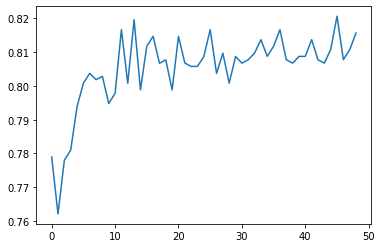

In [85]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.show()

In [86]:
print(np.argmax(acc_list))

45
